<a href="https://colab.research.google.com/github/Antonyjerson/House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME** : S.Jerson

**BATCH**: D15

**PROJECT**: CHENNAI HOUSE PRICE PREDICTION

IMPORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix



LOADING THE DATASET

In [ ]:
data=pd.read_csv("train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.shape

(7109, 22)

In [ ]:
data.dtypes
#Gathering features datatype 



PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

DROPPING RELIABLE FEATURES

In [ ]:
data.drop('PRT_ID', axis=1, inplace=True)
data.drop(['REG_FEE','COMMIS'], axis=1, inplace=True)


**DATA CLEANING**

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


SPELLING CORRECTION

In [ ]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data['SALE_COND'].replace(['Ab Normal','Adj Land','Partiall','PartiaLl'],['AbNormal','AdjLand','Partial','Partial'],inplace=True)

In [ ]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data['AREA'].replace(['Karapakam','Ana Nagar','Ann Nagar','Adyr','Velchery','Chrompt','Chrmpet','Chormpet','TNagar','KKNagar'],['Karapakkam','Anna Nagar','Anna Nagar','Adyar','Velachery','Chrompet','Chrompet','Chrompet','T Nagar','KK Nagar'],inplace=True)
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data['STREET'].unique()
data['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data['BUILDTYPE'].unique()


array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data['UTILITY_AVAIL'].unique()#99.93%=allpub and 0.07%=nosewa

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data['UTILITY_AVAIL'].replace(['AllPub'],['All Pub'],inplace=True)
data['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
data['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)

In [ ]:
data.head(10)


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250
5,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,12394750
6,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Others,All Pub,No Access,RL,3.6,2.1,2.5,2.670,8488790
7,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,All Pub,Gravel,RM,2.4,4.5,2.1,3.260,16800250
8,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,8308970
9,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,8083650


CHECKING MISSING VALUES IN FEATURES

In [ ]:
data.isnull().any()

AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
SALES_PRICE      False
dtype: bool

In [ ]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

**filling null values with the mode of a column**

In [ ]:
data['N_BATHROOM']=data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])

In [ ]:
data['N_BEDROOM']=data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])

In [ ]:
data['QS_OVERALL']=data['QS_OVERALL'].fillna(data['QS_OVERALL'].mode()[0])

In [ ]:
data1=data.copy()
data1

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [ ]:
#checking no Nan values in data
data1.isnull().any()

AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM        False
N_BATHROOM       False
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL       False
SALES_PRICE      False
dtype: bool

In [ ]:
data1.isnull().sum().sum()


0

CHANGING THESE FEATURES INTO DATETIME DATATYPE

In [ ]:
data1['DATE_SALE'] = pd.to_datetime( data1['DATE_SALE'])
data1['DATE_BUILD'] = pd.to_datetime( data1['DATE_BUILD'])


In [ ]:
data1['BUILD_YEAR'] = data1['DATE_BUILD'].dt.year
data1['SALED_YEAR'] = data1['DATE_SALE'].dt.year

In [ ]:
data1['HOUSE_AGE'] = data1['SALED_YEAR'] -data1['BUILD_YEAR']

In [ ]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503502,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525448,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.510000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


In [ ]:
data1.drop(['SALED_YEAR','BUILD_YEAR','QS_OVERALL','DATE_SALE','DATE_BUILD'], axis =1, inplace=True)

**EDA ANALYSIS** (EXPLORATORY DATA ANALYSIS) 

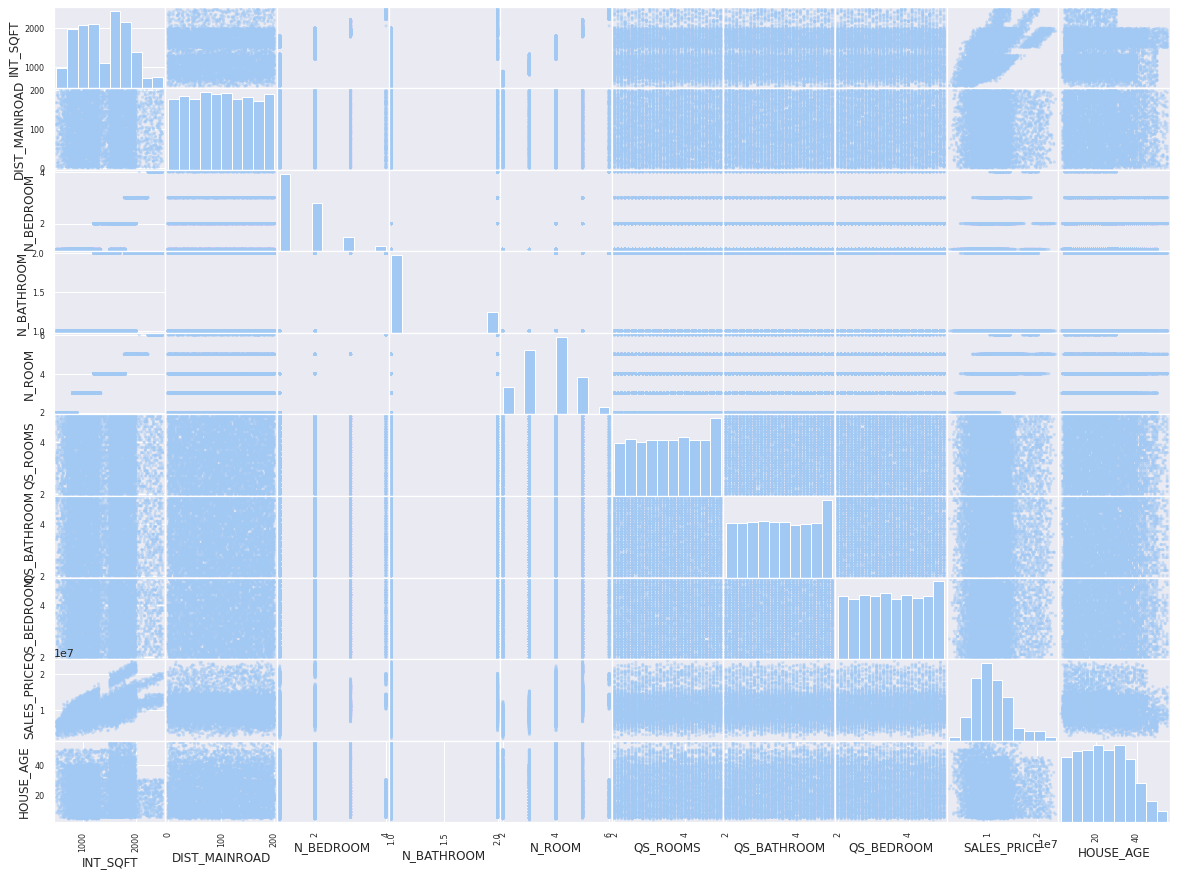

In [ ]:
scatter_matrix(data1)
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.show()

VALUE COUNTS WITH **BAR-PLOTS**

Chrompet      23.941483
Karapakkam    19.215079
KK Nagar      14.024476
Velachery     13.799409
Anna Nagar    11.084541
Adyar         10.887607
T Nagar        7.047405
Name: AREA, dtype: float64

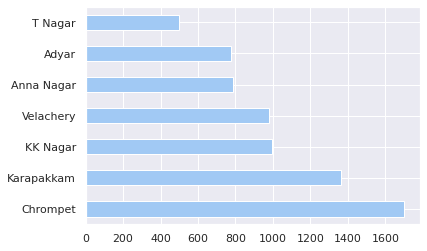

In [ ]:
data1['AREA'].value_counts().plot(kind="barh")
data1['AREA'].value_counts()/len(data1)*100

AdjLand        20.241947
Partial        20.157547
Normal Sale    20.016880
AbNormal       19.848080
Family         19.735546
Name: SALE_COND, dtype: float64

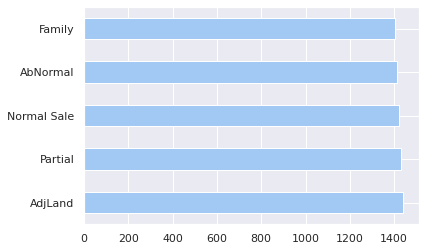

In [ ]:
data1['SALE_COND'].value_counts().plot(kind='barh')
data1['SALE_COND'].value_counts()/len(data1)*100

House         34.378956
Others        32.859755
Commercial    32.761289
Name: BUILDTYPE, dtype: float64

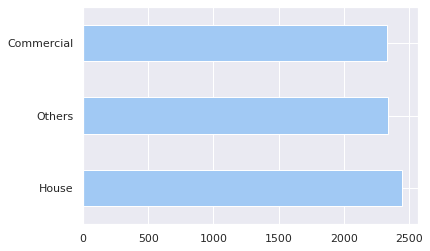

In [ ]:
data1['BUILDTYPE'].value_counts().plot(kind="barh")
data1['BUILDTYPE'].value_counts()/len(data1)*100


Yes    50.457167
No     49.542833
Name: PARK_FACIL, dtype: float64

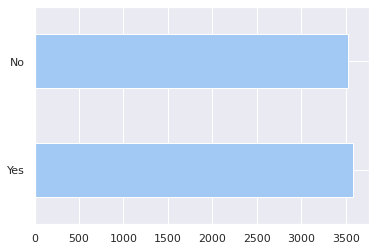

In [ ]:
data1['PARK_FACIL'].value_counts().plot(kind='barh')
data1['PARK_FACIL'].value_counts()/len(data1)*100

All Pub    26.543818
NoSeWa     26.318751
NoSewr     25.727950
ELO        21.409481
Name: UTILITY_AVAIL, dtype: float64

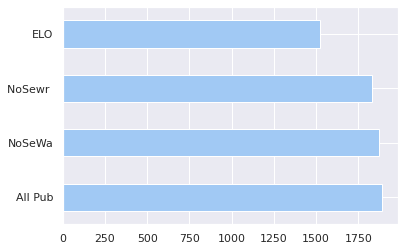

In [ ]:
data1['UTILITY_AVAIL'].value_counts().plot(kind='barh')
data1['UTILITY_AVAIL'].value_counts()/len(data1)*100

Paved        36.179491
Gravel       35.448024
No Access    28.372486
Name: STREET, dtype: float64

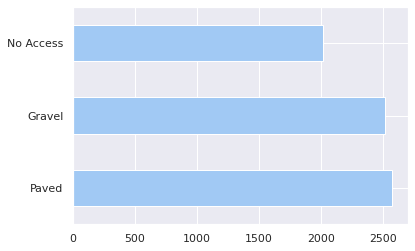

In [ ]:
data1['STREET'].value_counts().plot(kind='barh')
data1['STREET'].value_counts()/len(data1)*100

RL    26.135884
RH    25.629484
RM    25.559150
C      7.736672
A      7.553805
I      7.385005
Name: MZZONE, dtype: float64

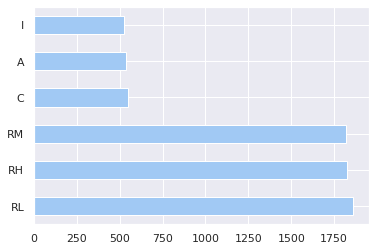

In [ ]:
data1['MZZONE'].value_counts().plot(kind='barh')
data1['MZZONE'].value_counts()/len(data1)*100

**DISTRIBUTION OF THE DATA**



BUILDTYPE - Number of "House" building type is higher than "Commercial" and 
"Other" building type.


AREA - Number of building in "Chrompet" is higher than other area's. "T Nagar" has low number of building when compared with other area's.


UTILITY_AVAILABLE - "NoSewer" building is higher than "ALLPUB" and "ELO" building.




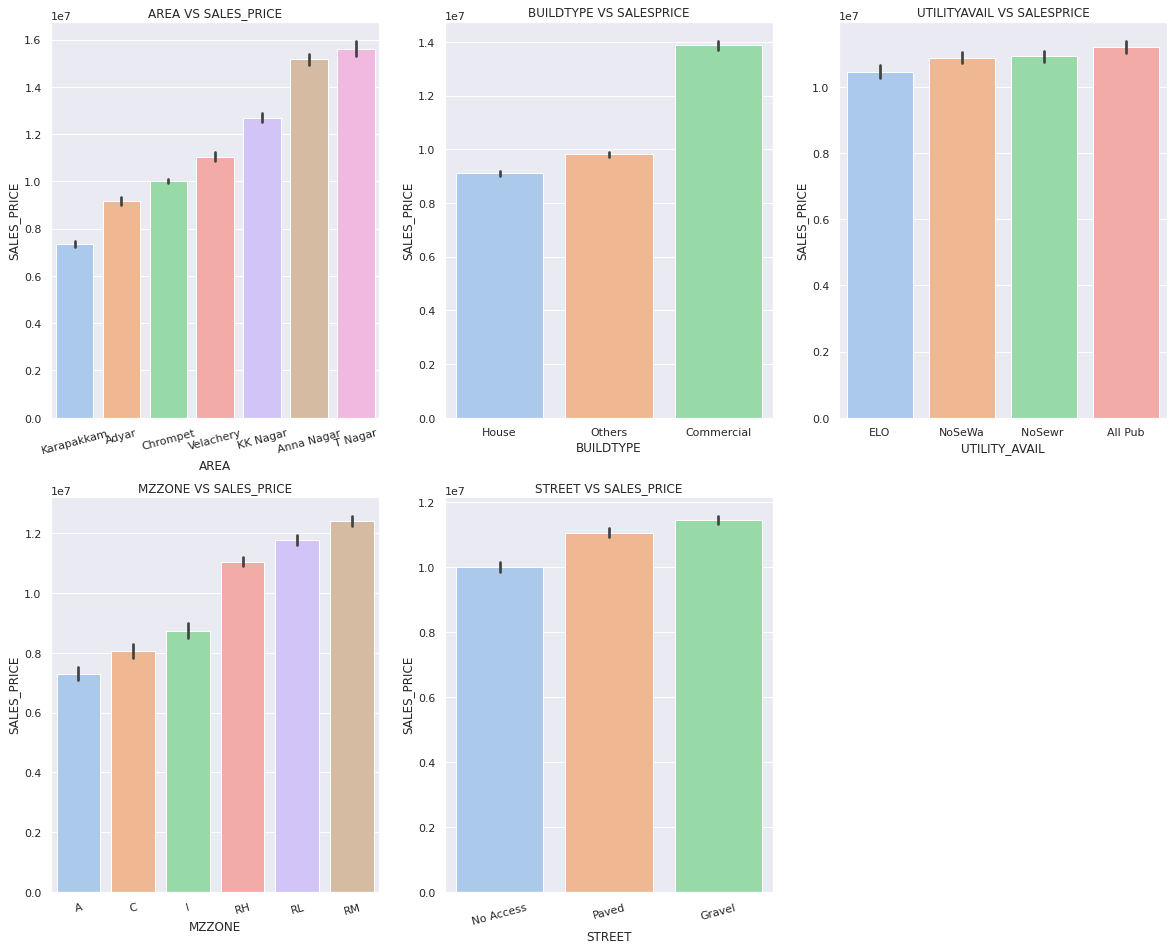

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=data1['AREA'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('AREA VS SALES_PRICE')
plt.subplot(232)
sns.barplot(x=data1['BUILDTYPE'],y=data1["SALES_PRICE"], data=data1,order=data1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE VS SALESPRICE')
plt.subplot(233)
sns.barplot(x=data1['UTILITY_AVAIL'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITYAVAIL VS SALESPRICE')
plt.subplot(234)
sns.barplot(x=data1['MZZONE'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MZZONE VS SALES_PRICE')
plt.subplot(235)
sns.barplot(x=data1['STREET'],y=data1['SALES_PRICE'],data = data1,order=data1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('STREET VS SALES_PRICE')
plt.show()

FROM THE ABOVE PLOTS:

THERE IS LINEAR RELATIONSHIP IN AREA VS SALESPRICE

THERE IS NO LINEAR RELATIONSHIP IN BUILDTYPE VS SALESPRICE

HERE ALSO LINEAR RELATIONSHIP IN UTILITYAVAIL VS SALESPRICE

THRER IS NO LINEAR RELATIONSHIP IN MZZONE VS SALESPRICE

THERE IS LINEAR RELATIONSHIP IN STREET VS SALESPRICE

IN T NAGAR AREA THE SALESPRICE IS HIGHER AND IN KARAPAKKAM AREA THE SALESPRICE IS LOWER

COMMERCIAL TYPE BULIDING HAS HIGHEST SALESPRICE

BULIDING IN GRAVEL TYPE STREET ARE HIGHER SALES PRICE THAN OTHER STREET

**HISTOGRAM** VIEW ON UNIVARIENT FEATURES

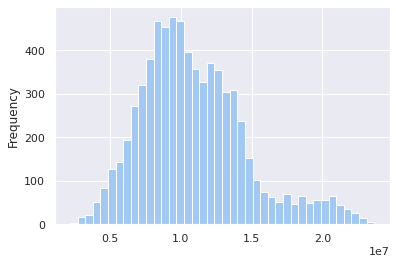

In [ ]:
data1['SALES_PRICE'].plot.hist(bins = 40)

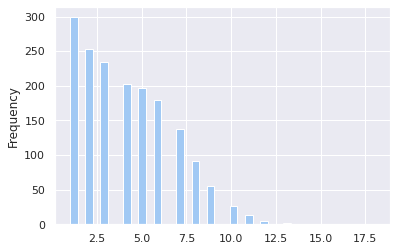

In [ ]:
data1['INT_SQFT'].value_counts().plot.hist(bins = 40)

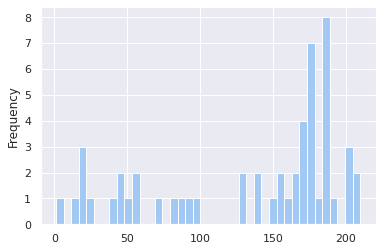

In [ ]:
data1['HOUSE_AGE'].value_counts().plot.hist(bins=40)

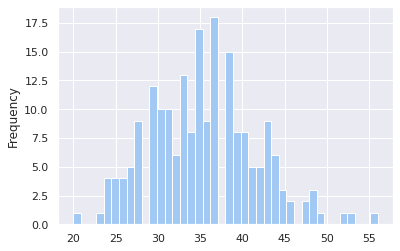

In [ ]:
data['DIST_MAINROAD'].value_counts().plot.hist(bins=40)

**PAIRPLOT VIEWS** ON COMPARISION WITH TARGET FEATURE

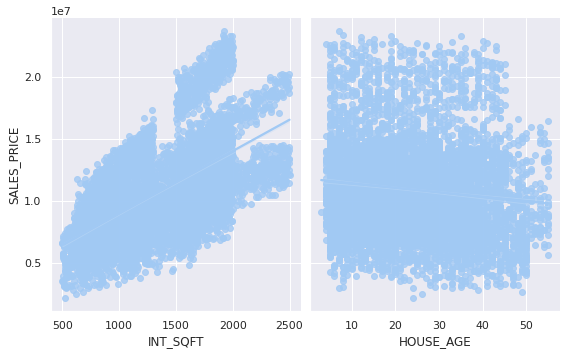

In [ ]:
sns.pairplot(data1,x_vars=["INT_SQFT","HOUSE_AGE"],y_vars=["SALES_PRICE"],height=5,aspect=.8,kind='reg')
plt.show()

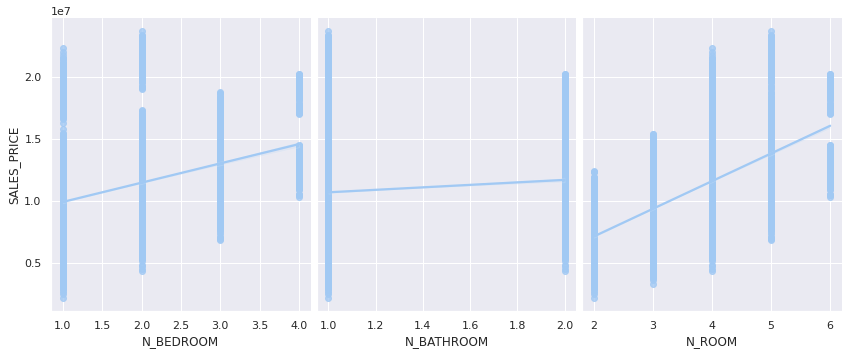

In [ ]:
sns.pairplot(data1,x_vars=["N_BEDROOM","N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8,kind='reg')
plt.show()

from above graph we know there is linear relation between target feature and other features

N_BATHROOM has no LINEAR RELATION so drop it

In [ ]:
data1.drop(["N_BATHROOM"],axis=1,inplace=True)

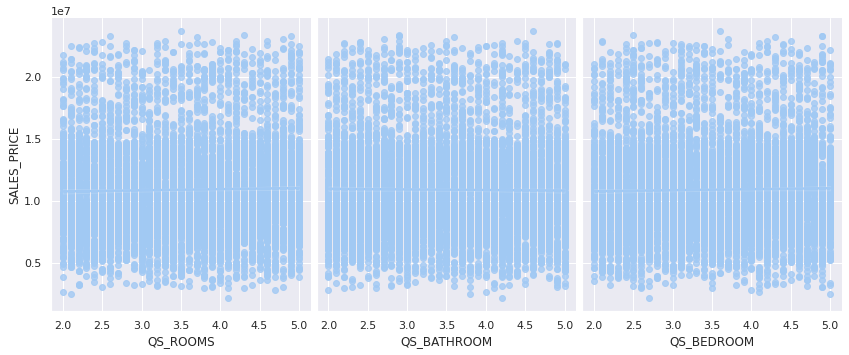

In [ ]:
sns.pairplot(data1,x_vars=["QS_ROOMS","QS_BATHROOM","QS_BEDROOM"],y_vars=["SALES_PRICE"],height=5,aspect=.8,kind="reg")
plt.show()


from above graph no features has the linear relation with TARGET feature['SALES_PRICE']vs Features['QS_ROOMS','QS_BATHROOM','QS_BEDROOM']
so dropping these features

In [ ]:
data1.drop(["HOUSE_AGE","QS_ROOMS","QS_BATHROOM","QS_BEDROOM"],axis=1,inplace = True)

**DATA ENCODING**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data1['AREA'].replace(["Karapakkam","Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"],['1','2','3','4','5','6','7'], inplace = True)
data1['AREA'] = pd.to_numeric(data1['AREA'])
data1['AREA'].dtypes

dtype('int64')

ONEHOT ENCODING DONE FOR BUILDTYPE SINCE ITS NOT LINEAR

In [ ]:
data1=pd.get_dummies(data1,columns=["BUILDTYPE"])

In [ ]:
data1['PARK_FACIL'] =le.fit_transform(data1["PARK_FACIL"])
data1['SALE_COND'] =le.fit_transform(data1["SALE_COND"])
data1['UTILITY_AVAIL'] =le.fit_transform(data1["UTILITY_AVAIL"])
data1['STREET'] =le.fit_transform(data1["STREET"])
data1['MZZONE'] =le.fit_transform(data1["MZZONE"])


In [ ]:
data1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1.0,3,0,1,0,2,0,7600000,1,0,0
1,6,1986,26,2.0,5,0,0,0,0,3,21717770,1,0,0
2,2,909,70,1.0,3,0,1,1,0,4,13159200,1,0,0
3,4,1855,14,3.0,5,2,0,3,2,2,9630290,0,0,1
4,1,1226,84,1.0,3,0,1,0,0,1,7406250,0,0,1


**DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [ ]:
X= data1.drop(['SALES_PRICE'],axis=1)
y= data1['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))

CORRELATON WITHIN FEATURES TO KNOW FEATURE IMPORTANTS

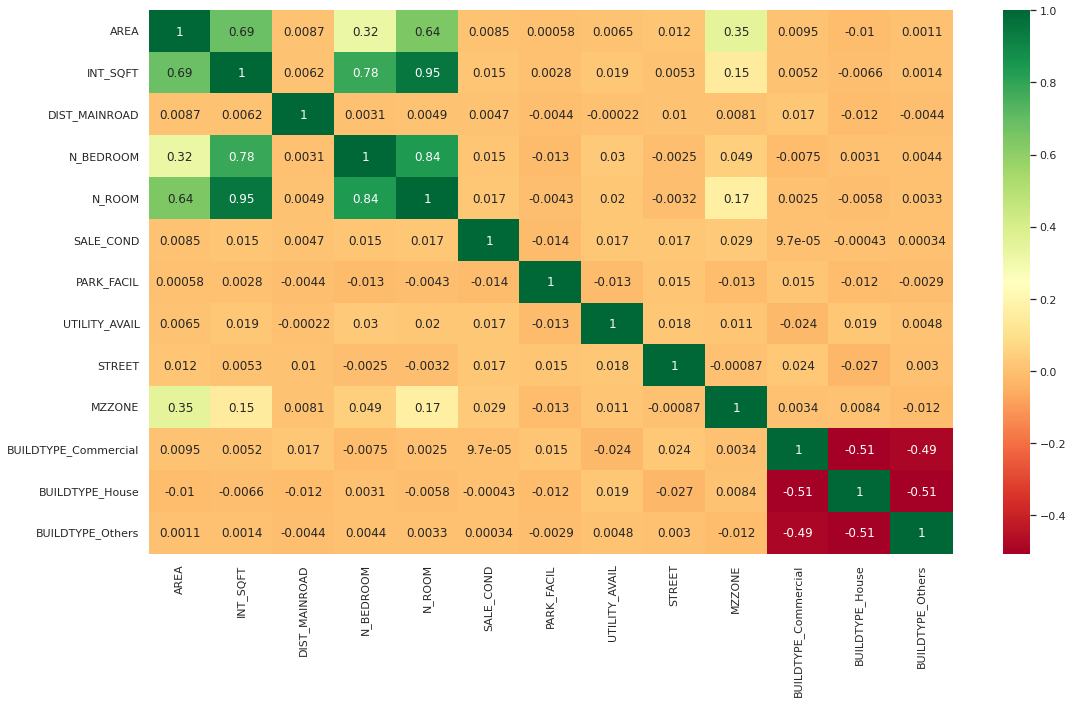

In [ ]:
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

CHECKING WHICH FEATURE HAS HIGH CORRELATION

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Checking which feature has more than 0.8 correlation

In [ ]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print(corr_features)

{'N_ROOM'}


In [ ]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [ ]:
cwf_train.shape

(5687, 12)

In [ ]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [ ]:
new_data1=pd.concat([train,test],axis=0)
new_data1.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",data1.shape)
print("NOW THE NO. OF FEATURE IS:",new_data1.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES ".format(data1.shape[1]-new_data1.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 14)
NOW THE NO. OF FEATURE IS: (7109, 13)
1 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES 


In [ ]:
X=new_data1.drop(['SALES_PRICE'],axis=1)
y=new_data1['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 12), (1422, 12), (5687,), (1422,))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   float64
 4   N_ROOM                7109 non-null   int64  
 5   SALE_COND             7109 non-null   int64  
 6   PARK_FACIL            7109 non-null   int64  
 7   UTILITY_AVAIL         7109 non-null   int64  
 8   STREET                7109 non-null   int64  
 9   MZZONE                7109 non-null   int64  
 10  SALES_PRICE           7109 non-null   int64  
 11  BUILDTYPE_Commercial  7109 non-null   uint8  
 12  BUILDTYPE_House       7109 non-null   uint8  
 13  BUILDTYPE_Others      7109 non-null   uint8  
dtypes: float64(1), int64(10), uint8(3)
memory usage: 631.9 KB


In [ ]:
best_features_X = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)
print()

AREA                    0.399210
INT_SQFT                0.391304
BUILDTYPE_Commercial    0.180381
N_BEDROOM               0.162127
MZZONE                  0.144615
BUILDTYPE_House         0.081287
BUILDTYPE_Others        0.039030
PARK_FACIL              0.021595
STREET                  0.013200
SALE_COND               0.010282
UTILITY_AVAIL           0.003983
DIST_MAINROAD           0.000000
dtype: float64

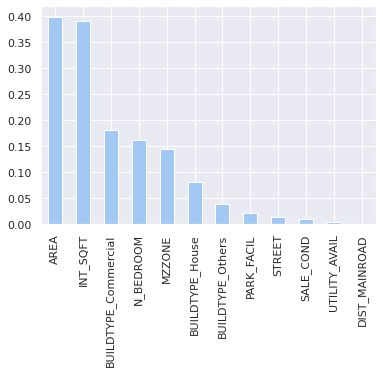

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False).plot(kind ="bar")
mutual_info.sort_values(ascending = False)

**DATA STANDARDIZE**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**MACHINE LEARNING MODEL** :

**Linear Regression**


In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
LinearRegression()
lr_y_pred=lr_model.predict(X_test)
print(r2_score(y_test,lr_y_pred))

0.8987042900685753


CROSS VALIDATION FOR LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_score
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.8961380074271664


**XGBOOST**


In [ ]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )
xg_model.fit(X_train_scaled,y_train)
xg_y_pred=xg_model.predict(X_test_scaled)
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

[07:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model Rsquared metric: 0.9959963335090789


CROSS VALIDATION FOR XG BOOST

In [ ]:
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[07:07:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:08:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**RandomForestRegressor**

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.8642756239962956


CROSS VALIDATION FOR RANDOM FOREST REGRESSOR

In [ ]:
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an RandomForest model is:",CV_RandomForest)

The cross_validation score of an RandomForest model is: 0.8583292348378064


**Ensemble Technique**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.978409459114185


R_SQUARED_SCORES

The score of an Linear_Regression model is : 0.9026927148561681

With cross-validation in Linear_Regression : 0.9008031457207558

The score of an XG_Boost model is : 0.9995000217324067

With cross-validation in XG_Boost : 0.9993411447703971

The score of an Random_Forest model is : 0.8527973080494938

With cross-validation in Random_Forest : 0.8466329580972938

The score of an Ensemble_technic is :  0.980197550122141


BEST MODEL:
My XGBoost model give me the high accuracy which is close to 1..


Followed by Ensemble Technique, Linear Regressor and RandomForest Regression.

**Model fitting without feature scaled data**

Model Fitting is used for price range predicton

In [ ]:
select_top_features = SelectKBest(mutual_info_regression,k=7)
select_top_features.fit(X_train,y_train)
X_train.columns[select_top_features.get_support()]

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'MZZONE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
X_train.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
X_train.drop(["DIST_MAINROAD","SALE_COND","PARK_FACIL","STREET","UTILITY_AVAIL"],axis = 1,inplace =True)
X_test.drop(["DIST_MAINROAD","SALE_COND","PARK_FACIL","STREET","UTILITY_AVAIL"],axis = 1,inplace =True)

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
print("Linear Regressor model Rsquared metric : ",r2_score(y_test,linear_pred))

Linear Regressor model Rsquared metric :  0.8793836611156868


In [ ]:
RF1 = RandomForestRegressor(n_estimators= 1000, max_depth = 10, max_features='sqrt')
RF1.fit(X_train, y_train)
RF1_pred = RF1.predict(X_test)
print("Random forest Regressor model Rsquared metric : ",r2_score(y_test,RF1_pred))

Random forest Regressor model Rsquared metric :  0.9592892047320678


From the above result RandomForest Regressor predicted well than linear regressor. So that Randomforest regressor is used for price range prediction.

Finding standard deviation of SALES_PRICE

In [ ]:
print("standard deviation of (SALES_PRICE) :",data1["SALES_PRICE"].std())

standard deviation of (SALES_PRICE) : 3768603.4570030593


In [ ]:
X_train.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'MZZONE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Taking these feature for price prediction

**price range prediction**

In [ ]:
from babel.numbers import format_currency
P_Range = RF1.predict([[1,1500,1,2,1,0,0]])
min = int(P_Range - (data1["SALES_PRICE"].std()))
min = format_currency( min, 'INR', locale='en_IN')
max = int(P_Range + (data1["SALES_PRICE"].std()))
max = format_currency(max, 'INR', locale='en_IN')
print('Estimated value is:', min , 'to', max)

Estimated value is: ₹63,76,945.00 to ₹1,39,14,152.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


From the above details, P_Range = RF1.predict([[1,1500,1,2,1,0,0]]) RF1 --> Randomforest Regressor model.

The features used for predictions are

AREA --> "Karapakkam": 1,"Adyar": 2,"Chrompet": 3,"Velachery": 4,"KK Nagar": 5,"Anna Nagar": 6,"T Nagar": 7.

INT_SQFT : ranges from 500 to 2500

N_BEDROOM : 1 ,2 ,3 ,4 .

MZZONE : "A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6.

BUILDTYPE_Commercial : if buildtype is commercial enter 1 otherwise enter 0.

BUILDTYPE_House: if buildtype is house enter 1 otherwise enter 0.

BUILDTYPE_Others : if buildtype is others enter 1 otherwise enter 0.

**FINAL INTERPRETATION**

Area feature is the important feature - if you want to buy or build house in Tnagar area is more value than the others and karapakkam area is least value than others.

Next important feature is INT square feet - if square feet increases price will also increases.

Next important feature is Buildtype - There are three different types(or) categories in buildtype. Buildtype_commercial is having high value than other two types.

Next important feature is MZZONE - In this feature there is an increasing order with the zones like "A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6. if u want to buy or build in RM zone the price range is higher than the other zones.

With this detail check the price range for your requirements with the detail to predict the HOUSE PRICE RANGE